# L&S 88 - Final Project - Airplane Etiquette Analysis
_Anna Burns, Howard Yan, Jordan Bailey_

In this notebook, we will attempt to reproduce the result of the analysis by Walt Hickey in his article _41 Percent Of Fliers Think You're Rude If You Recline Your Seat_ The original analysis is hosted [on FiveThirtyEight](https://fivethirtyeight.com/features/airplane-etiquette-recline-seat/). The original analysis computed statistics on survey data in an attempt to determine what the public feels is proper airplane etiquette.


**Table of Contents**
1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
2. [Reproducing the Statistics](#Reproducing-the-Statistics)
3. [A/B Testing Without Outliers](#A/B-Testing-Without-Outliers)
4. [Reliability of the Data](#Reliability-of-the-Data)
5. [Conclusions](#Conclusions)
6. [Sources](#Sources)

In [3]:
from datascience import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## Exploratory Data Analysis

We begin by loading in the dataset which was downloaded from Github.

In [21]:
data = Table.read_table('https://raw.githubusercontent.com/ls88-openscienceconnector/final-project-team-2/master/data/flying-etiquette.csv')
data.show(5)

RespondentID,How often do you travel by plane?,Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?","On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?","Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?",Is itrude to recline your seat on a plane?,"Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?",Is it rude to ask someone to switch seats with you in order to be closer to friends?,Is itrude to ask someone to switch seats with you in order to be closer to family?,Is it rude to wake a passenger up if you are trying to go to the bathroom?,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Gender,Age,Household Income,Education,Location (Census Region)
3436139758,Once a year or less,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Twice,"Yes, they should not recline their chair if the person behind them asks them not to","Yes, somewhat rude",No,"No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude","No, not at all rude",No,No,Male,30-44,nan,Graduate degree,Pacific
3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have exclusive control,"No, not rude at all","No, not at all rude",Three times,"Yes, they should not recline their chair if the person behind them asks them not to","No, not rude at all",No,"No, not at all rude","No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Three times,"No, the person on the flight has no obligation to the person behind them","No, not rude at all",No,"Yes, somewhat rude","No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",Twice,"No, the person on the flight has no obligation to the person behind them","No, not rude at all",No,"No, not at all rude","No, not at all rude","Yes, somewhat rude","Yes, somewhat rude","Yes, somewhat rude","Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In the article, Hickey only focuses on people who didn't answer "Never" to the question "How often do you travel by plane?". Here we remove those rows to clean the data.

In [22]:
clean_data= data.where("How often do you travel by plane?", are.not_equal_to("Never"))
clean_data.num_rows

874

The article does not provide a lot of information of the types of responses they recieved. Here we do some exploratory analysis to see the demographics of the people who responded to the survey.

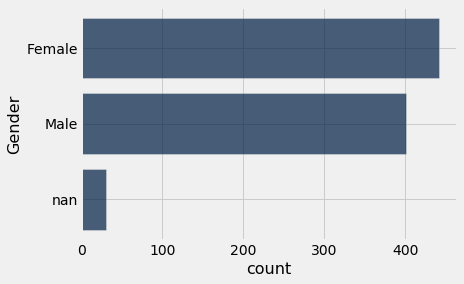

In [23]:
clean_data.group("Gender").barh(0)

**Here, we observe there are more females than males in the dataset.**

Below is the distribution of the ages of respondents.

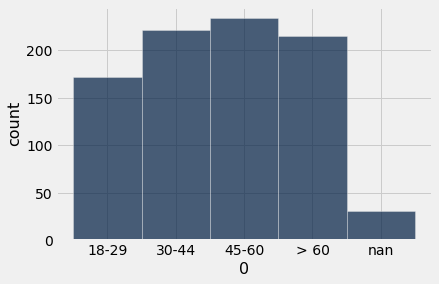

In [6]:
clean_data.group("Age").bar(0)

**The age is centered aroud 44-45.**

Below is the distribution of household income.

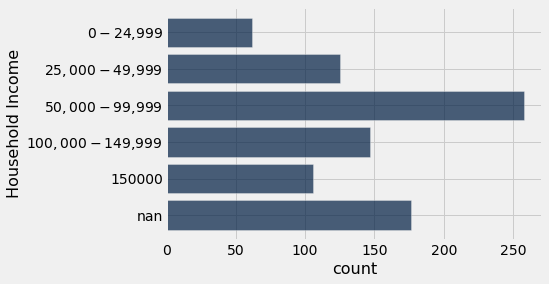

In [7]:
clean_data.group("Household Income").with_column("order", make_array(0, 3, 1,  2, 4, 5)).sort("order").drop("order").barh(0)

**The household income is centered around 50-99,000 per year.**

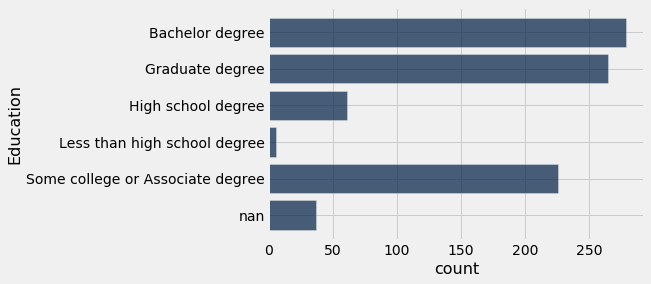

In [50]:
clean_data.group('Education').barh(0)

**The vast majority of repondents have degrees in higher level education. There's an unexpectedly high number of graduate degree holders.**

## Reproducing the Statistics
In this section, we will go through each claim of the article and recalculate their statistics. The methods are outlined for the first claim, then streamlined into a function to be repeated for the remaining claims.

**The first claim from the article:** "Let’s first tackle the question of reclining seats. Of 858 respondents, 16 percent always recline, 20 percent usually do, 14 percent recline about half the time, 30 percent do only once in a while, and 20 percent never recline."

_The first step is to select the particular question we're interested in and remove the "nan" values (people who didn't answer the question)_

In [18]:
seats_no_na = data.select("Do you ever recline your seat when you fly?").where(0, are.not_equal_to("nan"))
seats_no_na.show(5)

Do you ever recline your seat when you fly?
About half the time
Usually
Always
About half the time
Usually


_Next, we group the responses to get a count for each response, then convert that count into a percentage._

In [19]:
seats_percentages = seats_no_na.group(0)
sum_to_perc = seats_percentages.column("count") / seats_no_na.num_rows
seats_percentages = seats_percentages.with_column("Percentages", sum_to_perc * 100).drop("count")
seats_percentages

Do you ever recline your seat when you fly?,Percentages
About half the time,13.7529
Always,15.9674
Never,19.9301
Once in a while,29.9534
Usually,20.3963


_This plot helps visualize the results we found._

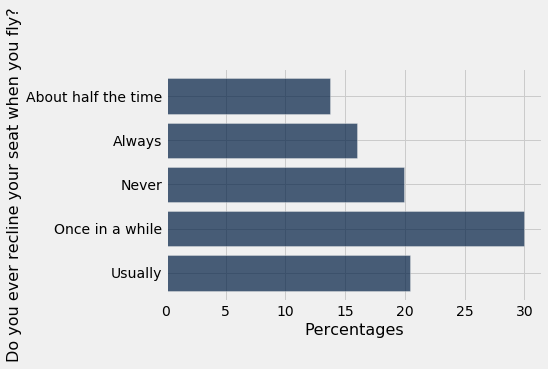

In [20]:
seats_percentages.barh(0)

Here, we define a function to streamline the analysis process. We can simply insert the question label and get back a table of the percentages of respondants' answers.

In [21]:
def percentages_from_label(col_label):
    no_na_data = data.select(col_label).where(0, are.not_equal_to("nan"))
    print(str(np.round(100 * no_na_data.num_rows / data.num_rows, decimals = 2)) + "% (" + str(no_na_data.num_rows) + "/874) of those surveyed answered the question")
    grouped_tbl = no_na_data.group(0)
    count_to_perc = grouped_tbl.column("count") / no_na_data.num_rows
    tbl_w_percentages = grouped_tbl.with_column("Percentages", count_to_perc * 100).drop("count")
    return tbl_w_percentages

**Claim from article:** "Only 41 percent of respondents thought it was very or somewhat rude to recline your seat during a flight."

In [23]:
percentages_from_label("Is itrude to recline your seat on a plane?")

97.71% (854/874) of those surveyed answered the question


Is itrude to recline your seat on a plane?,Percentages
"No, not rude at all",58.7822
"Yes, somewhat rude",32.904
"Yes, very rude",8.31382


**Our findings match the article's claim.**

**Claim from article:** "Most people (70 percent) said they would not eliminate the option to recline seats on flights. "

In [24]:
percentages_from_label("Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?")

97.71% (854/874) of those surveyed answered the question


"Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?",Percentages
No,69.6721
Yes,30.3279


**Our findings match the article's claim.**

**Claim from article:** "\[...\] most people (64 percent) also said passengers should not recline if the flier behind them asks them not to. The rest of them said a passenger has no obligation to the person behind them."

In [25]:
percentages_from_label('Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?')

97.71% (854/874) of those surveyed answered the question


"Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?",Percentages
"No, the person on the flight has no obligation to the person behind them",36.4169
"Yes, they should not recline their chair if the person behind them asks them not to",63.5831


**Our findings match the article's claim.**

**Claim from article:** "Interestingly, people’s responses to questions about kids depended a lot on whether they had children younger than 18. Only 21 percent of 188 parents thought bringing unruly children on a plane was “very rude,” compared to 47 percent of the 657 people without kids. Passengers without children under 18 were three times as likely to consider bringing a baby on a plane very or somewhat rude than people with kids."

In [26]:
percentages_from_label('In general, is it rude to knowingly bring unruly children on a plane?')

97.14% (849/874) of those surveyed answered the question


"In general, is it rude to knowingly bring unruly children on a plane?",Percentages
"No, not at all rude",17.3145
"Yes, somewhat rude",41.3428
"Yes, very rude",41.3428


**Claim from article:** "Only 14 percent of fliers said that, in a row with three seats, the person seated in the middle got both arm rests. Ten percent of respondents are fascists who said whoever puts their arm on the arm rest first gets it; 2 percent are sadists who think the people in the aisle and window seats get both arm rests; and 67 percent are socialists who think they should be shared. Five percent responded “other” and wrote in responses such as “whoever is largest” or “the youngest child” or “me.”"

In [27]:
percentages_from_label('In a row of three seats, who should get to use the two arm rests?')

97.94% (856/874) of those surveyed answered the question


"In a row of three seats, who should get to use the two arm rests?",Percentages
Other (please specify),5.25701
The arm rests should be shared,68.5748
The people in the aisle and window seats get both arm rests,2.1028
The person in the middle seat gets both arm rests,13.9019
Whoever puts their arm on the arm rest first,10.1636


**Our findings match the article's claim.**

**Claim from article:** "Forty-two percent of respondents acknowledged that the person in the window seat should control the shade, and 58 percent thought everyone should have a say in the shade’s status."

In [28]:
percentages_from_label('Who should have control over the window shade?')

97.94% (856/874) of those surveyed answered the question


Who should have control over the window shade?,Percentages
Everyone in the row should have some say,57.8271
The person in the window seat should have exclusive control,42.1729


**Our findings match the article's claim.**

**Claim from article:** "A full 16 percent of respondents had used personal electronics during take off and landing in violation of the direction of flight attendants."

In [34]:
percentages_from_label("Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?")

97.14% (849/874) of those surveyed answered the question


Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Percentages
No,83.9812
Yes,16.0188


**Our findings match the article's claim.**

**Claim from article:** "do people actually smoke in bathrooms? — seven respondents admitted they had illegally smoked there."

In [35]:
percentages_from_label('Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?')

97.14% (849/874) of those surveyed answered the question


Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?,Percentages
No,99.1755
Yes,0.824499


**Our findings match the article's claim. Our findings show that the article directly rounded to the nearest whole number for percentages.**

## Window Woes: Throwing Shade

Here we'll look further into whether gender is associated with window shade responses.

What would be more interesting is by grouping the responses by gender to see if there would be any differences of percentages between men and women compared to both genders.

First, we will create 2 tables of the data for each gender.

In [51]:
data_male = clean_data.where("Gender", "Male")
data_female = clean_data.where("Gender", "Female")

print("Males: " + str(data_male.num_rows), "Females: " + str(data_female.num_rows))

Males: 401 Females: 442


**Then, we will take the responses from each table while also removing any NaN values.**

In [52]:
data_male_q = data_male.select("Who should have control over the window shade?").where(0, are.not_equal_to("nan"))
data_female_q = data_female.select("Who should have control over the window shade?").where(0, are.not_equal_to("nan"))

print("Male Respondents")
data_male_q.show(5)
print("Female Respondents")
data_female_q.show(5)

Male Respondents


Who should have control over the window shade?
Everyone in the row should have some say
The person in the window seat should have exclusive control
Everyone in the row should have some say
Everyone in the row should have some say
The person in the window seat should have exclusive control


Female Respondents


Who should have control over the window shade?
The person in the window seat should have exclusive control
The person in the window seat should have exclusive control
Everyone in the row should have some say
Everyone in the row should have some say
The person in the window seat should have exclusive control


**Now, we group each responses from the male and female tables by "count" to find the percentages, similarly to the percentages_from_label function.**

In [56]:
male_group = data_male_q.group(0)
male_per = male_group.column("count")/data_male.num_rows
male_per_table = male_group.with_column("Male Percentages", male_per * 100).drop("count")

female_group = data_female_q.group(0)
female_per = female_group.column("count")/data_female.num_rows
female_per_table = female_group.with_column("Female Percentages", female_per * 100).drop("count")

male_per_table

Who should have control over the window shade?,Male Percentages
Everyone in the row should have some say,56.6085
The person in the window seat should have exclusive control,43.3915


**There are 56% of males who believed that everyone should have some say, and 43% believe that the person in the window seat should have exclusive control. These percentages are similar when comparing the responses overall.**

In [57]:
female_per_table

Who should have control over the window shade?,Female Percentages
Everyone in the row should have some say,59.5023
The person in the window seat should have exclusive control,40.4977


More women responded that everyone in the row should have some say in shade, similarly to the responses overall. However, there is a slightly higher percentage of women who had this response than men.

Therefore, in the survey, there were slightly more women who believed that everyone in the row have their preferable amount of shade.

**Here is a bar chart, comparing these 2 genders.**

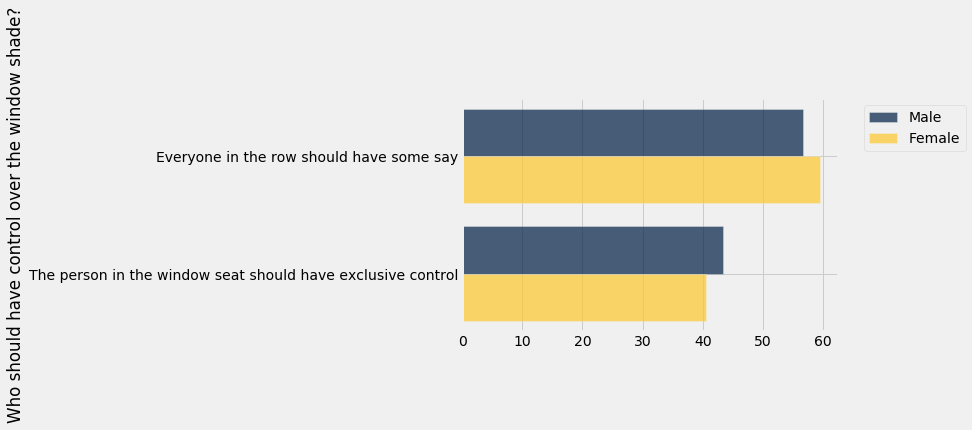

In [58]:
male_and_female = Table().with_columns(
            "Who should have control over the window shade?", male_per_table.column(0),
            "Male", male_per_table.column(1),
            "Female", female_per_table.column(1))
male_and_female.barh("Who should have control over the window shade?")

## Simulating Sneaky Smokers: Pants on Fire
Here, we run a simulation to determine the true proportion of passangers who have smoked in the bathroom.

**The following functions calculate a bootstrap simulation and construct a histogram.**

In [60]:
def true_smokers(repetitions):
    smokers_collect=make_array()
    for i in np.arange(repetitions):
        shuffle_table=clean_data.sample()
        how_many_smoke=shuffle_table.select('Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?')
        how_many_smoke_2=how_many_smoke.where(0,'Yes')
        proportion_of_smokers=how_many_smoke_2.num_rows/clean_data.num_rows
        smokers_collect=np.append(smokers_collect,proportion_of_smokers)
    return smokers_collect
    
def histogram_smokers(results):
    create_table=Table().with_column('Proportion of smokers',results)
    return create_table.hist()

In [62]:
boot_2000 = true_smokers(2000)

array([0.00572082, 0.00915332, 0.00686499, ..., 0.01029748, 0.00343249,
       0.00800915])

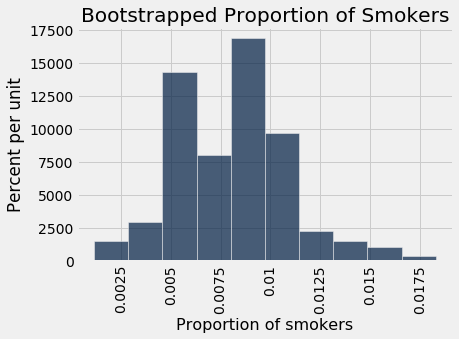

In [64]:
display(boot_2000)
histogram_smokers(boot_2000)
plt.title("Bootstrapped Proportion of Smokers");

In [65]:
def confidence_level(confidence_level,results):
    step_1=percentile(confidence_level,results)
    step_2=percentile(100-confidence_level,results)
    print("Our " + str(confidence_level)+ "% Confidence Interval is: ")
    return step_2,step_1

In [66]:
confidence_level(95, boot_2000)

Our 95% Confidence Interval is: 


(0.003432494279176201, 0.012585812356979404)

## Finding Flightless Folks: You're grounded.
What about for those who had never took an airplane ride? Can we find any additional information about this group, since it was included in the data? Let's filter the original data including NaN values.

In [28]:
nevers = data.where("How often do you travel by plane?", "Never")
count_never_nans = nevers.drop([0,1,22, 23,24,25, 26])
count_never_nans.show(5)

Do you ever recline your seat when you fly?,How tall are you?,Do you have any children under 18?,"In a row of three seats, who should get to use the two arm rests?","In a row of two seats, who should get to use the middle arm rest?",Who should have control over the window shade?,Is itrude to move to an unsold seat on a plane?,"Generally speaking, is it rude to say more than a few words tothe stranger sitting next to you on a plane?","On a 6 hour flight from NYC to LA, how many times is it acceptable to get up if you're not in an aisle seat?","Under normal circumstances, does a person who reclines their seat during a flight have any obligation to the person sitting behind them?",Is itrude to recline your seat on a plane?,"Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?",Is it rude to ask someone to switch seats with you in order to be closer to friends?,Is itrude to ask someone to switch seats with you in order to be closer to family?,Is it rude to wake a passenger up if you are trying to go to the bathroom?,Is itrude to wake a passenger up if you are trying to walk around?,"In general, is itrude to bring a baby on a plane?","In general, is it rude to knowingly bring unruly children on a plane?",Have you ever used personal electronics during take off or landing in violation of a flight attendant's direction?,Have you ever smoked a cigarette in an airplane bathroom when it was against the rules?
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


**There are lots of NaN values here! Just to be sure, did all people who said "Never" have no responses to any of the questions?**

In [29]:
def allcontainsNan(x):
    for col in x:
        if "nan" not in x.column(col):
            return False
    return True
allcontainsNan(count_never_nans)

True

Of course! They have no experience and no way of answering the rest of the questions. Now, lets see the demographics of those who responded "Never" from the data.

There are slightly more females than men who responded with "Never".


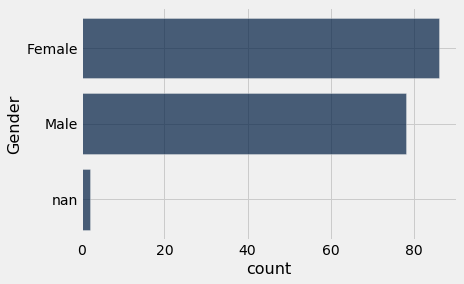

In [115]:
print('There are slightly more females than men who responded with "Never".')
nevers.group("Gender").barh(0)

Those who are younger (millenials) are more likely to never been in an airplane ride.


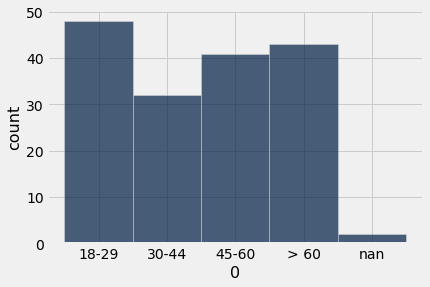

In [31]:
print('Those who are younger (millenials) are more likely to never been in an airplane ride.')
nevers.group("Age").bar(0)


Those who are living in lower income are more likely to never been in an airplane ride (affordability factor?).


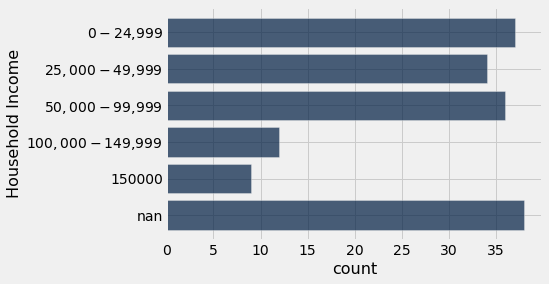

In [33]:
print('Those who are living in lower income are more likely to never been in an airplane ride (affordability factor?).')
nevers.group("Household Income").with_column("order", make_array(0, 3, 1,  2, 4, 5)).sort("order").drop("order").barh(0)


More people who have some college or an Associates degree have never been in an airplane ride. (cost factors from tuition fees?)


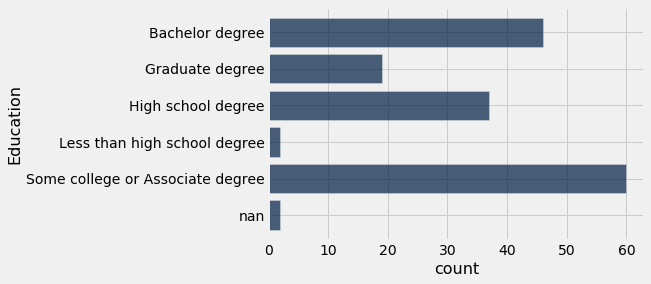

In [32]:
print('More people who have some college or an Associates degree have never been in an airplane ride. (cost factors from tuition fees?)')
nevers.group("Education").barh(0)

## No Extrapolation Without Representation!
Is the distrubution those who have never flown an airplane in the survey the same as whole US population? 
Based on a 2016 article entitled, 
[How Much of the World’s Population Has Flown in an Airplane?](https://www.airspacemag.com/daily-planet/how-much-worlds-population-has-flown-airplane-180957719/), the Omnibus Household Survey conducted by the U.S. Bureau of Transportation Statistics that estimated from 2003, 18% of Americans said they had never flown in their life. There is a lot of estimation and guess involved since there isn't concrete data for everyone's experience of flight, but we do have the information from the survey. **Does the survey's sample represent the proportion of all Americans who have never flown on an airplane?** Let's create a null and an alternative hypothesis.


**Null hypothesis:** The proportion of people who have never flown in our survey data is representative of the US population. Any difference is due to chance.

**Alternative hypothesis:** Our survey is not representative of the population.

**Let's find out the observed value in the dataset for those who has never flown by finding the proportion of those who haven't been and the total people in the survey.**

In [36]:
observed_never_flown = nevers.num_rows / data.num_rows
observed_never_flown

0.1596153846153846

**Now, we will return a simulated test statistic (the distance between our expected value and the simulated value) by sampling proportions based on our null hypothesis (18%).**

In [38]:
proportions = make_array(.82, .18)

def test_statistic():
    simulated_stat = sample_proportions(data.num_rows, proportions).item(1)
    return abs(.18 - simulated_stat)
test_statistic()

0.019038461538461532

**Now we will use test statistic to simulate 10,000 times under our null hypothesis of distances between our observed values.**

In [39]:
simulation = make_array()

for i in np.arange(10000): 
    simulated_stat = test_statistic()
    simulation = np.append(simulated_stat, simulation)
    
simulation

array([0.01711538, 0.00461538, 0.01557692, ..., 0.01269231, 0.00884615,
       0.01076923])

**Now let make a histogram of our array of test statistics simulation! Our observed value from the sample is the red dot.**

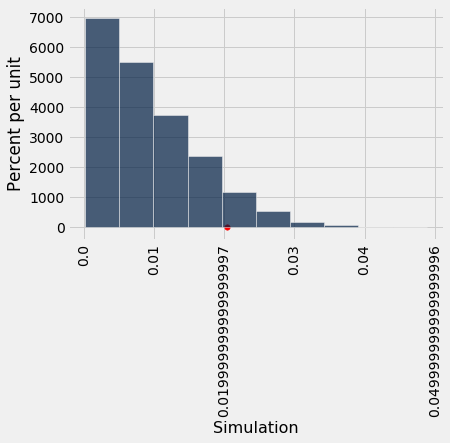

In [45]:
simulation_table = Table().with_column('Simulation', simulation)
simulation_table.hist()
plt.scatter(abs(.18 - observed_never_flown), 0, color='red', s=30);

In [48]:
observed_p_value=simulation_table.where(0,are.above_or_equal_to(abs(.18 - observed_never_flown))).num_rows/10000

print("Our observed p-value is " + str(observed_p_value))

Our observed p-value is 0.0862


**Our observed p-value (0.0862) is greater than 0.05. Therefore, we fail to reject the null hypothesis.** (Note there is a high likelihood our data isn't representative of the population since it's not a simple random sample)

## Inclining to Recline: To Seat or Not to Seat
Now, we will observe the relationship between height and antipathy towards reclining seats. 

**1) For instance, are taller people more likely to answer yes to removing reclining seats?**

In [68]:
height_and_reclining=clean_data.select('How tall are you?','Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?').where(0,are.not_equal_to('nan')).where(1,are.not_equal_to('nan'))
height_and_reclining

How tall are you?,"Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?"
"6'3""",No
"5'8""",No
"5'11""",No
"5'7""",No
"5'9""",No
"6'2""",Yes
"6'0""",Yes
"6'0""",Yes
"5'6""",Yes
"6'0""",No


In [69]:
height_and_reclining.group(1)

"Given the opportunity, would you eliminate the possibility of reclining seats on planes entirely?",count
No,595
Yes,259


In [91]:
processed_height=height_and_reclining.pivot(1,0)
counts_column=height_and_reclining.group(0).column(1)
processed_height_2=processed_height.with_column('Counts',counts_column)
yes=100*processed_height_2.column('Yes')/processed_height_2.column('Counts')
no=100*processed_height_2.column('No')/processed_height_2.column('Counts')
processed_height_3=processed_height_2.with_column('Percentage Yes',yes,'Percentage No',no)
indexes = np.append(1 + np.arange(19), 0)
processed_height_final = processed_height_3.with_column("i", indexes).sort("i").drop("i")
processed_height_final

How tall are you?,No,Yes,Counts,Percentage Yes,Percentage No
Under 5 ft.,11,1,12,8.33333,91.6667
"5'0""",12,5,17,29.4118,70.5882
"5'1""",11,8,19,42.1053,57.8947
"5'10""",40,26,66,39.3939,60.6061
"5'11""",33,21,54,38.8889,61.1111
"5'2""",30,15,45,33.3333,66.6667
"5'3""",38,10,48,20.8333,79.1667
"5'4""",56,22,78,28.2051,71.7949
"5'5""",53,18,71,25.3521,74.6479
"5'6""",56,19,75,25.3333,74.6667


In [103]:
processed_height_final[0][0] = "- 5 ft."

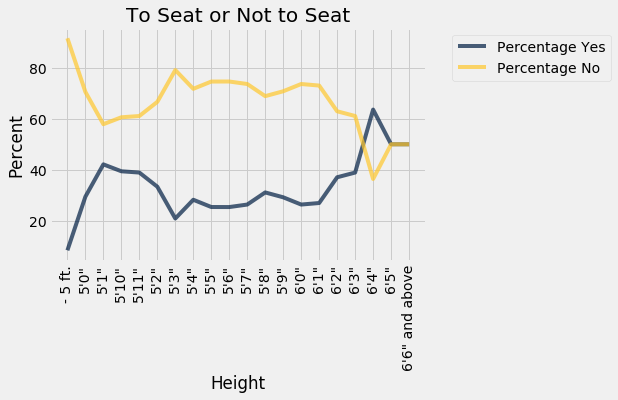

In [110]:
processed_height_final.select(0,4,5).plot(0)
plt.xticks(processed_height_final[0], rotation="vertical")
plt.title("To Seat or Not to Seat")
plt.ylabel("Percent")
plt.xlabel("Height");

It appears the percentage of respondents who would like to remove reclining seats and those who don't slowly converge as height increases, before spiking towards the end of the graph, then reconverging. Coincidence? It seems that short people want to keep reclining seats and taller people are more likely to support removing them until the two lines converge towards the end. We have insufficient data to draw accurate conclusions especially at the extremes.

**Now, we will look at how the Yes and No groups stand (or sit) overall!**

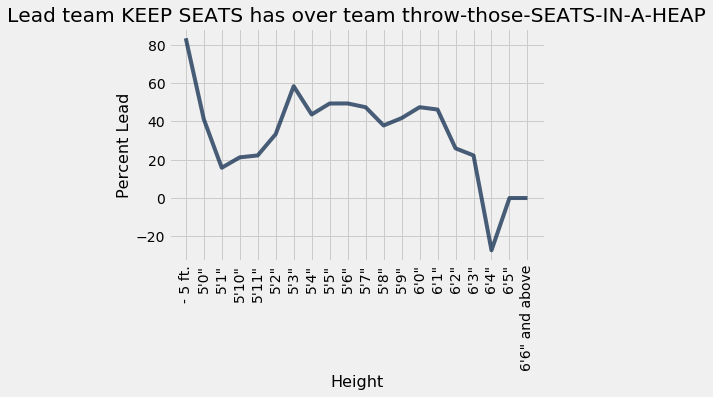

In [113]:
Differences=processed_height_final.column('Percentage No')-processed_height_final.column('Percentage Yes')
Differences_refined=processed_height_final.with_column('Differences',Differences)
Differences_refined[0][0] = "- 5 ft."
Differences_refined.plot(0,6)
plt.xticks(Differences_refined[0], rotation="vertical")
plt.title("Lead team KEEP SEATS has over team throw-those-SEATS-IN-A-HEAP")
plt.ylabel("Percent Lead")
plt.xlabel("Height");

The plot above indicates the percentage of people who want to keep reclining minus the percentage who would support getting rid of reclining. It seems Team No gradually loses as height increases!

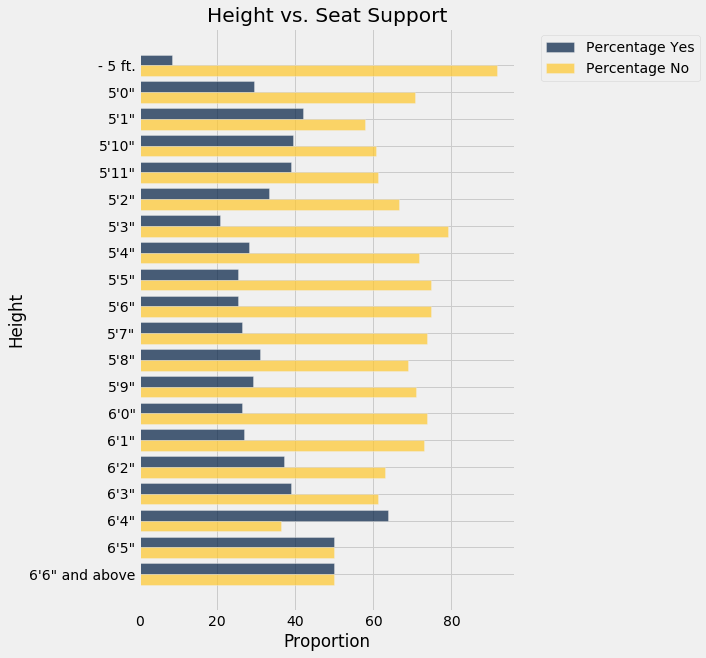

In [114]:
Differences_refined.select(0,'Percentage Yes','Percentage No').barh(0)
plt.title("Height vs. Seat Support")
plt.xlabel("Proportion")
plt.ylabel("Height");

## Reliability of the Data

The original data on which this analysis is based was from a survey on SurveyMonkey. This data was a survey, not a simple random sample. This means that we cannot make any claims about causation between variables.

Additionally, the structure of the survey and its responses could have led or limited the data. For many questions there were only polarizing responses availiable or options that were entirely subjective (ex. "somewhat rude" vs. "very rude").

## Conclusions

The data provided corroborated the article's claims. The only discrepancies concerned rounding to the nearest whole number, which is understandable given the context of reading an article. 

We were able to use survey data to go beyond the questions posed. While we recognize the data is not of ideal quality, it was nonetheless interesting to commit analysis and draw eye-opening conclusions. 

## Sources

Hickey, Walt. _41 Percent Of Fliers Think You’re Rude If You Recline Your Seat_. FiveThirtyEight, 2014. [https://fivethirtyeight.com/features/airplane-etiquette-recline-seat/](https://fivethirtyeight.com/features/airplane-etiquette-recline-seat/).

Pyles, Chris. Insurance Data. Github. 12 March 2019. [https://github.com/chrispyles/jupyter/blob/master/content/notebooks/insurance/insurance.ipynb](https://github.com/chrispyles/jupyter/blob/master/content/notebooks/insurance/insurance.ipynb).